**Importing Libraries and loading the Dataframe**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding="ISO-8859-1")

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.head()
df.rename(columns={"Restaurant ID":"restaurant_id","Restaurant Name":"restaurant_name","Country Code":"country_code","Cuisines": "cuisines",
                           "Locality Verbose":"locality_verbose","Average Cost for two":"average_cost_two","Has Table booking":"table_booking",
                           "Has Online delivery":"online_delivery","Is delivering now":"is_delivering_now","Switch to order menu":"switch_to_order",
                           "Price range":"price_range","Aggregate rating":"agg_rating","Rating color":"rating_color","Rating text":"rating_text"},inplace=True)

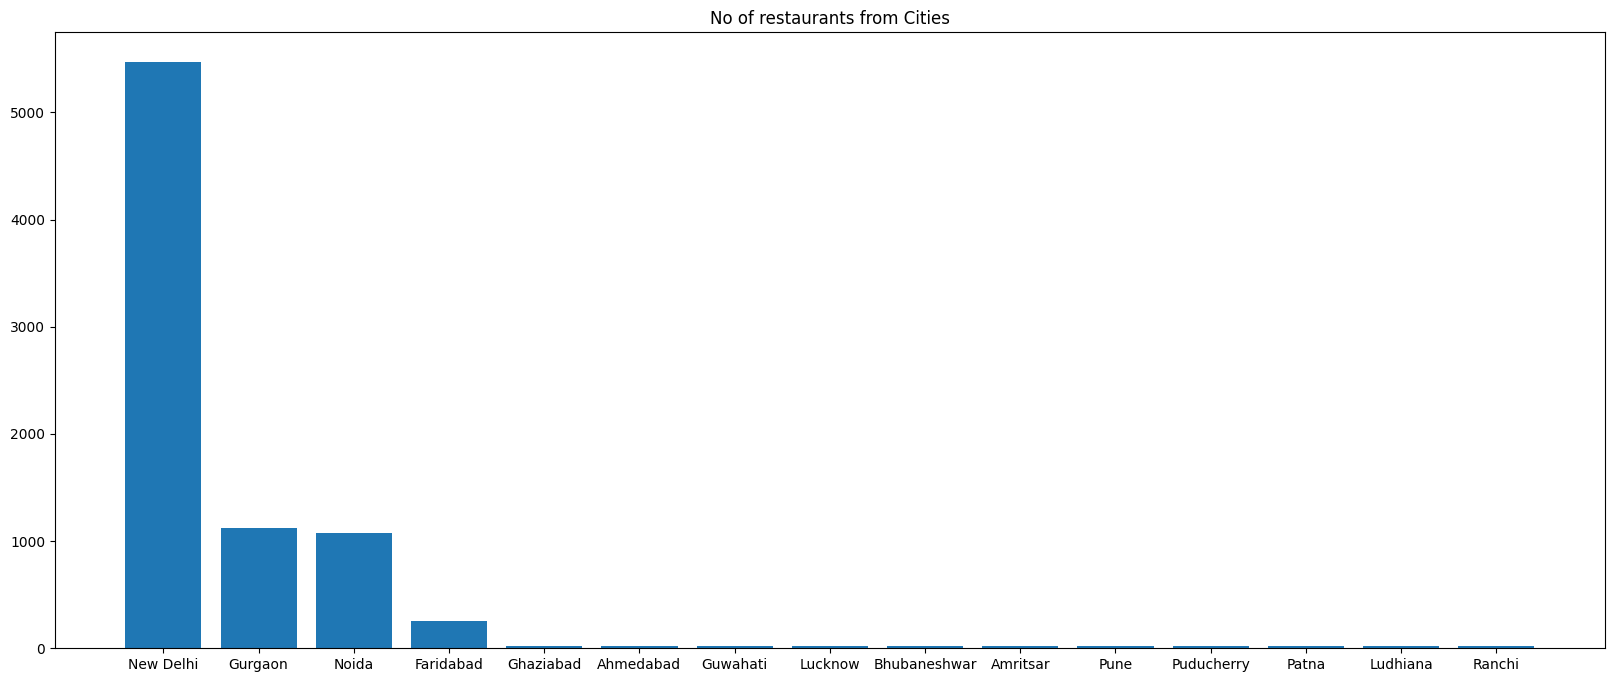

In [ ]:
df = df[df.country_code==1]
counts = df['City'].value_counts()
# counts
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(counts.index[0:15], counts[0:15])
ax.set_title('No of restaurants from Cities')
plt.show()

<Figure size 600x600 with 0 Axes>

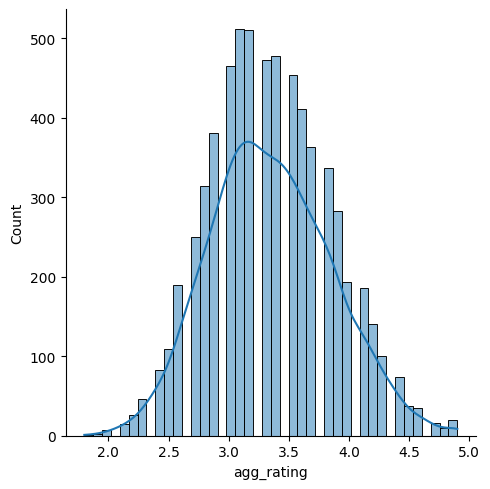

In [ ]:
plt.figure(figsize=(6,6))
sns.displot(df[df["rating_text"]!="Not rated"]['agg_rating'],kde=True)
plt.show()

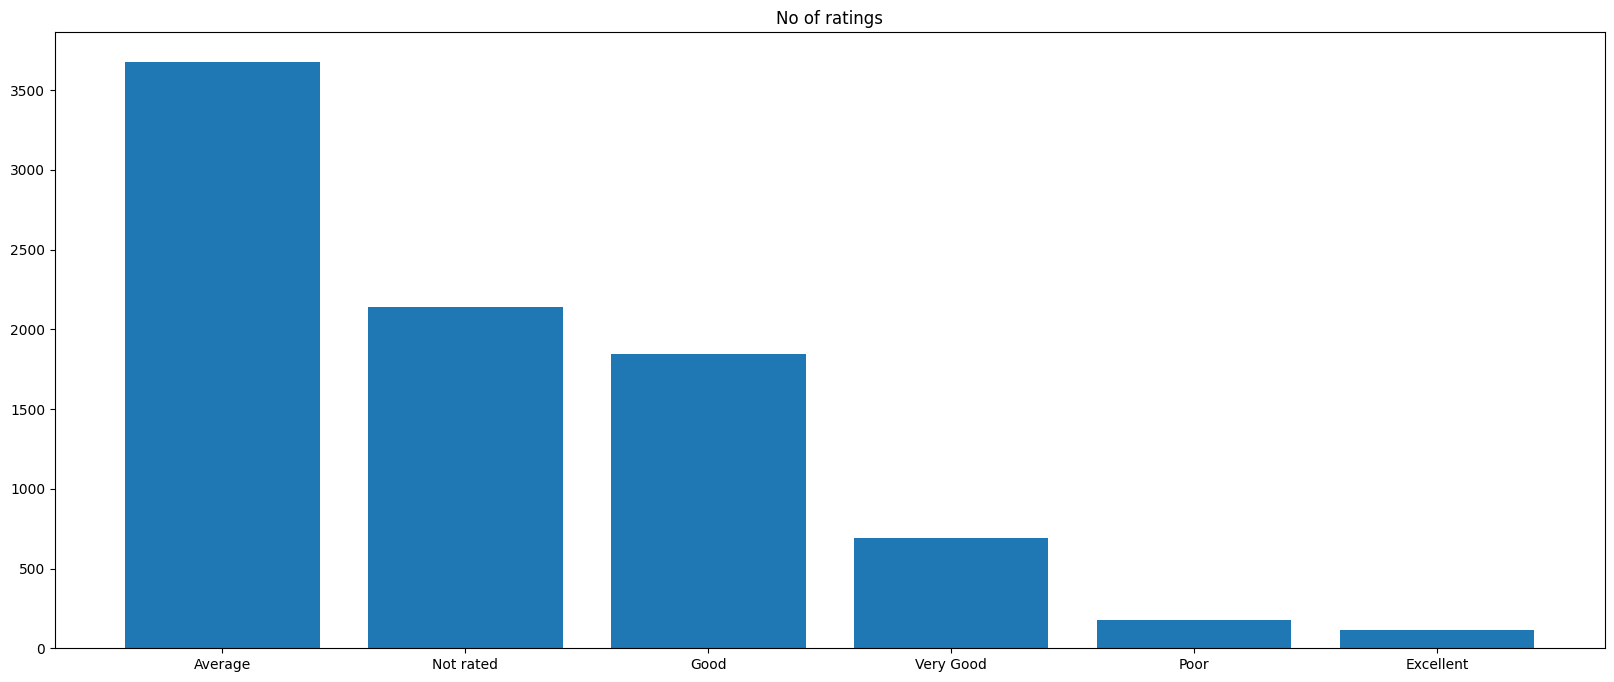

In [ ]:
counts = df['rating_text'].value_counts()
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(counts.index[0:15], counts[0:15])
ax.set_title('No of ratings')
plt.show()

In [ ]:
cuisines=df.cuisines
cuInd=cuisines.str.split(',').explode()
cuInd=cuInd.str.strip()
unique_cuisines=cuInd.unique().tolist()
print("Total Number Of Unique Cuisines- "+str(len(unique_cuisines)))

Total Number Of Unique Cuisines- 90


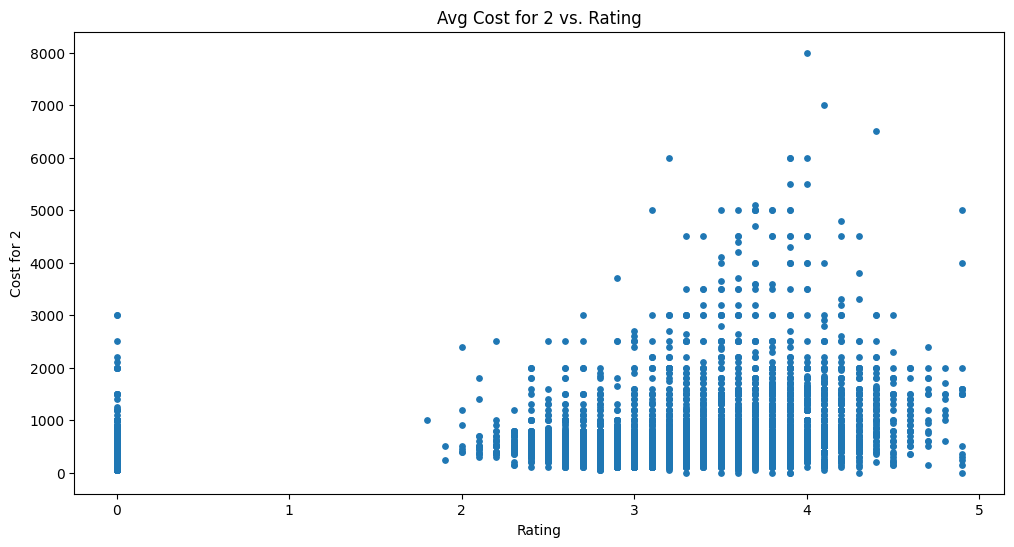

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['agg_rating'], df['average_cost_two'],  s=15)
ax.set_ylabel('Cost for 2')
ax.set_xlabel('Rating')
ax.set_title('Avg Cost for 2 vs. Rating')
plt.show()


**Correlation between price and Rating?**

We can see all price ranges have both high and low ratings, there isnt any noticable effect

In [ ]:
top_10 = df['City'].value_counts()[:10].rename_axis('Country').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,Country,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Ahmedabad,21
6,Guwahati,21
7,Lucknow,21
8,Bhubaneshwar,21
9,Amritsar,21


The top 5 cities that use Zomato are given above

In [ ]:
df['online_delivery'].value_counts()

No     6229
Yes    2423
Name: online_delivery, dtype: int64

We can see that most restaurants do not have online delivery

In [ ]:
dataT=df[(df.rating_text!="Not rated")&df['country_code']==1].copy()

Lets calculate the correlation matrix

<ipython-input-16-cc3695804e85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m=dataT.corr()


<Axes: >

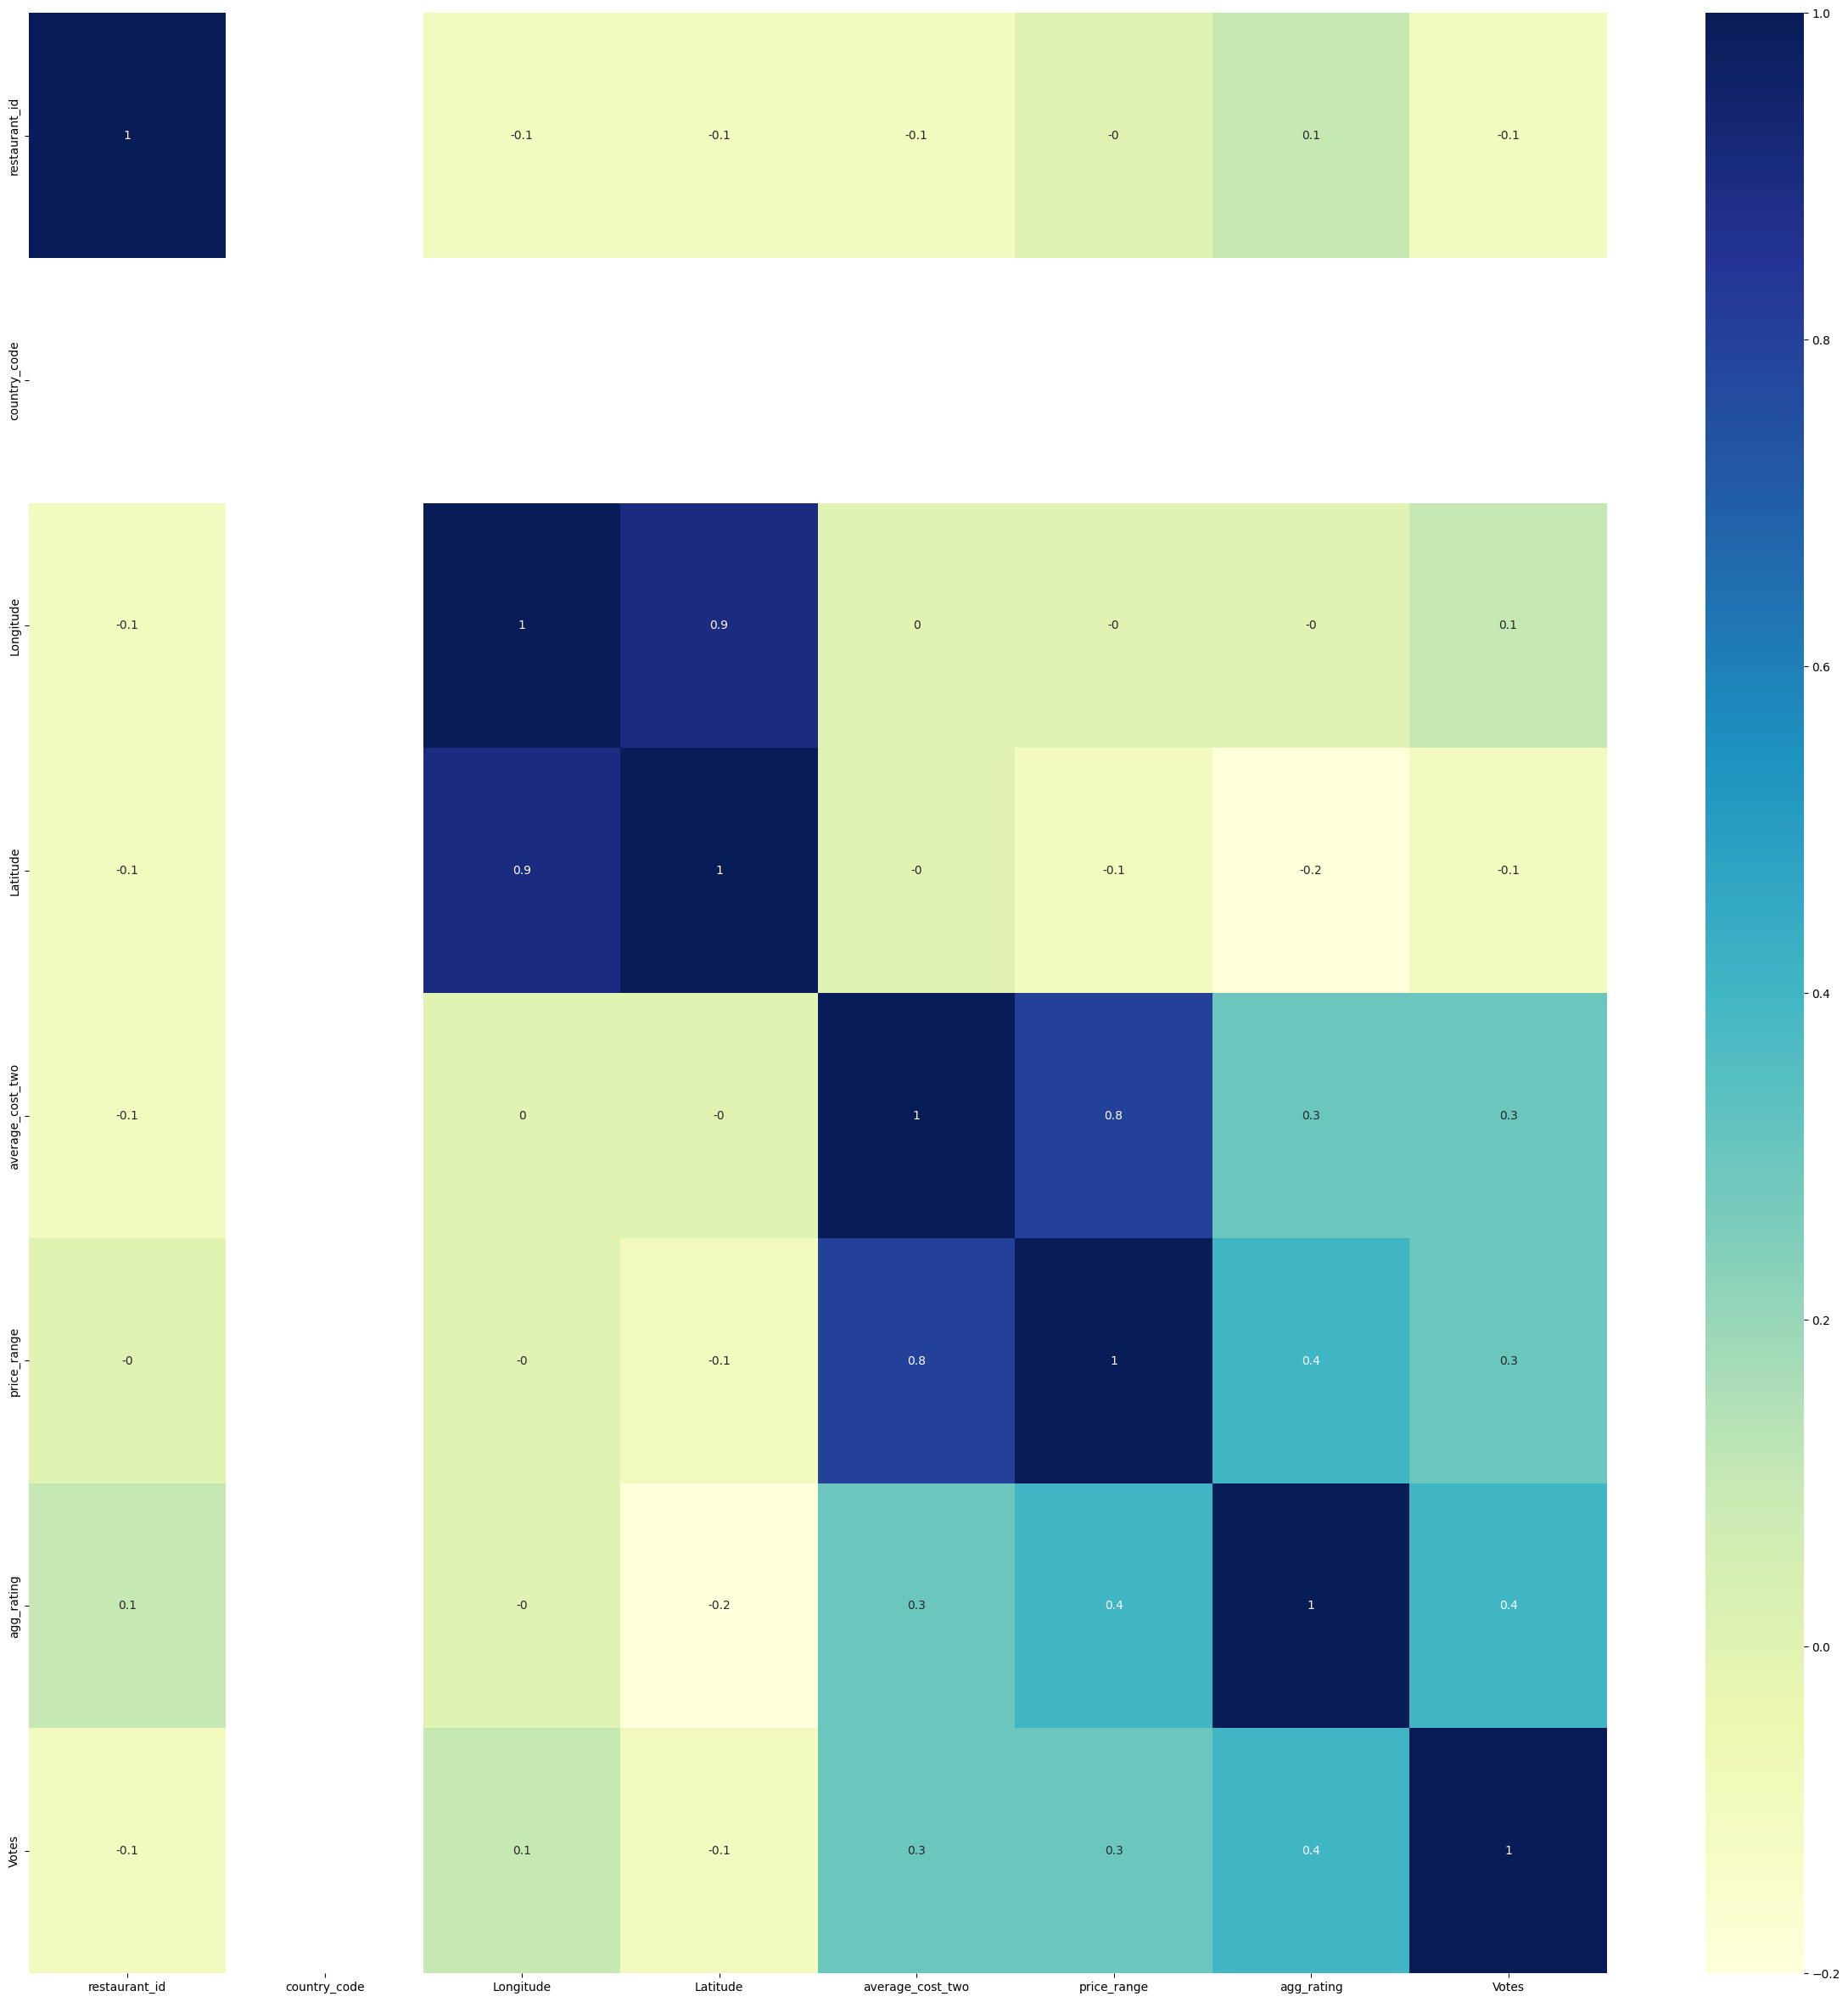

In [ ]:
corr_m=dataT.corr()
corr_m=round(corr_m,1)
plt.figure(figsize = (30,30))
sns.heatmap(corr_m, annot = True, cmap="YlGnBu")

In [ ]:
df.isnull().sum()

restaurant_id        0
restaurant_name      0
country_code         0
City                 0
Address              0
Locality             0
locality_verbose     0
Longitude            0
Latitude             0
cuisines             0
average_cost_two     0
Currency             0
table_booking        0
online_delivery      0
is_delivering_now    0
switch_to_order      0
price_range          0
agg_rating           0
rating_color         0
rating_text          0
Votes                0
dtype: int64

# **Preprocessing**

Let's select only the columns with numerical Values and form a data frame to train our model

In [ ]:
Col_select=["City","table_booking","Locality","online_delivery","average_cost_two","Votes","agg_rating", 'cuisines']
dataT=dataT[Col_select]
dataT.head(70)

,City,table_booking,Locality,online_delivery,average_cost_two,Votes,agg_rating,cuisines
624,Agra,No,Agra Cantt,No,850,140,3.9,"North Indian, Mughlai"
625,Agra,No,Agra Cantt,No,700,71,3.5,"North Indian, Mughlai"
626,Agra,No,Agra Cantt,No,500,94,3.6,North Indian
627,Agra,No,Civil Lines,No,400,87,4.0,Rajasthani
628,Agra,No,Civil Lines,No,1000,177,4.2,"North Indian, Chinese, Mughlai"
...,...,...,...,...,...,...,...,...
689,Amritsar,No,INA Colony,No,150,56,3.6,Street Food
690,Amritsar,No,INA Colony,No,300,91,3.5,North Indian
691,Amritsar,No,Ranjit Avenue,No,500,26,3.4,"Cafe, Bakery, Fast Food"
692,Amritsar,No,Ranjit Avenue,No,1200,98,3.4,"North Indian, Mughlai, Chinese"


In [ ]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 624 to 9275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              6513 non-null   object 
 1   table_booking     6513 non-null   object 
 2   Locality          6513 non-null   object 
 3   online_delivery   6513 non-null   object 
 4   average_cost_two  6513 non-null   int64  
 5   Votes             6513 non-null   int64  
 6   agg_rating        6513 non-null   float64
 7   cuisines          6513 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 457.9+ KB


encoding is done to convert Categorical Data into Numerical classes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataT['City'] = le.fit_transform(dataT['City'])
dataT['Locality'] = le.fit_transform(dataT['Locality'])
dataT['online_delivery'] = le.fit_transform(dataT['online_delivery'])
dataT['table_booking'] = le.fit_transform(dataT['table_booking'])

In [ ]:
dataT.head()

,City,table_booking,Locality,online_delivery,average_cost_two,Votes,agg_rating,cuisines
624,0,0,13,0,850,140,3.9,"North Indian, Mughlai"
625,0,0,13,0,700,71,3.5,"North Indian, Mughlai"
626,0,0,13,0,500,94,3.6,North Indian
627,0,0,107,0,400,87,4.0,Rajasthani
628,0,0,107,0,1000,177,4.2,"North Indian, Chinese, Mughlai"


In [ ]:
from sklearn.model_selection import train_test_split

X=dataT.drop('agg_rating',axis=1)
y=dataT['agg_rating']
X['no_of_cuisines'] = dataT.cuisines.str.count(',')+1
X.drop('cuisines',axis=1)
#SPlitting the data into 4 datframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

we have converted the cuisines column into a new column that keeps track of how many cuisines a restaurant serves

In [ ]:
X_train.drop(['cuisines'],axis=1,inplace=True)
X_test.drop(['cuisines'],axis=1,inplace=True)
X_test.head()

,City,table_booking,Locality,online_delivery,average_cost_two,Votes,no_of_cuisines
8197,32,1,398,0,2200,135,3
2293,16,0,710,0,500,99,6
2110,15,1,644,1,800,321,2
2899,31,0,92,0,200,382,2
4542,31,1,310,1,800,306,3


# **Linear Regression**

In [ ]:
lr = LinearRegression() # Defing the linear regression model 
lr.fit(X_train,y_train) #Fitting the data into the algorithm
lr_pred = lr.predict(X_test)

In [ ]:
coef=pd.DataFrame(data={"Features":lr.feature_names_in_,"Coeff":lr.coef_})
coef.head(10)

,Features,Coeff
0,City,-0.007095
1,table_booking,-0.039608
2,Locality,-0.000279
3,online_delivery,0.013321
4,average_cost_two,0.000178
5,Votes,0.000299
6,no_of_cuisines,0.020825


In [ ]:
print(r2_score(y_test,np.round(lr_pred,decimals=1))) 
print('RMSE score through Linear regression : ',np.sqrt(mean_squared_error(y_test,np.round(lr_pred,decimals=1))))

0.22024429013664015
RMSE score through Linear regression :  0.4614959432427093


In [47]:
import plotly.express as px

# Display regression plane
fig = px.scatter_3d(dataT, x='Votes', y='average_cost_two', z='online_delivery',
                    color='agg_rating')
fig.update_traces(marker=dict(size=3))
fig.add_surface(x=X_train['Votes'], y=X_train['average_cost_two'],
                z=X_train['online_delivery'], surfacecolor=lr.predict(X_train), opacity=0.8)
fig.show()

#**Decision Tree** 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print('RMSE score through Decision tree regression : ',np.sqrt(mean_squared_error(y_test,np.round(dt_pred,decimals=1))))

RMSE score through Decision tree regression :  0.5170679481945806


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('RMSE score through Random Forest : ',np.sqrt(mean_squared_error(y_test,np.round(rf_pred,decimals=1))))

RMSE score through Random Forest :  0.3856297936735174


# **XGBoost**

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=4)
xgb.fit(X_train,y_train)
xgb_pred= xgb.predict(X_test)
print('RMSE score through XGBoost : ',np.sqrt(mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))

RMSE score through XGBoost :  0.37604851731732564
R square value using XGBoost 0.488827616850227


In [ ]:
import xgboost
from xgboost import plot_tree
from xgboost import DMatrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=4)
xgb.fit(X_train,y_train)
xgb_pred= xgb.predict(X_test)
print('RMSE score through XGBoost : ',np.sqrt(mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))

RMSE score through XGBoost :  0.37604851731732564
R square value using XGBoost 0.488827616850227


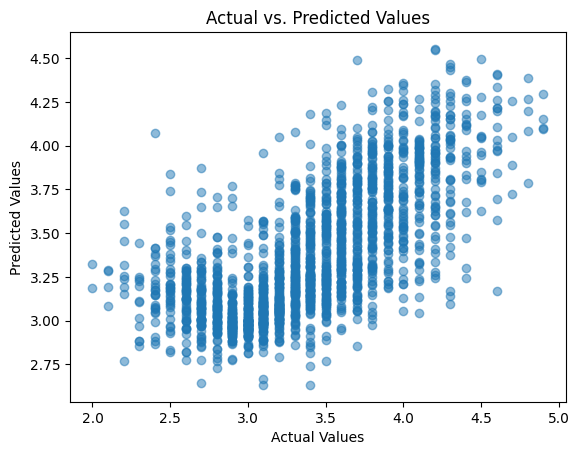

In [ ]:
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

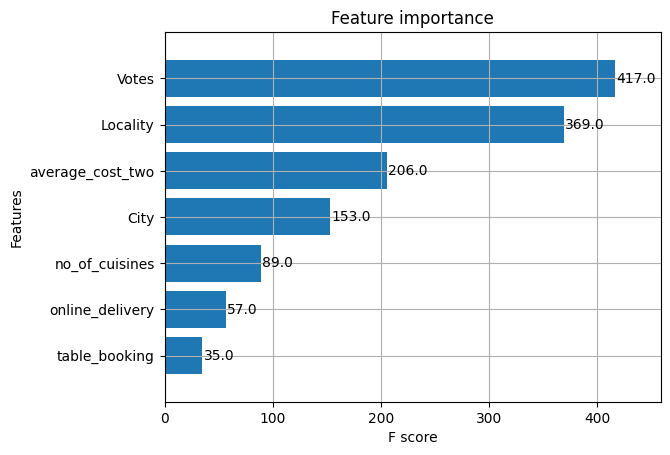

In [ ]:
xgboost.plot_importance(xgb, height=0.8, max_num_features=10)
plt.show()

In [ ]:
y_pred = xgb.predict(X_test)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first 10 rows of the results DataFrame
print(results.head(10))

      Actual  Predicted
8197     3.2   3.081816
2293     4.2   3.383701
2110     3.6   3.453489
2899     4.2   3.849375
4542     3.6   3.633426
2934     2.7   3.189342
5214     4.2   3.650117
7502     3.4   3.562223
2374     4.1   3.945616
2366     4.1   3.787013


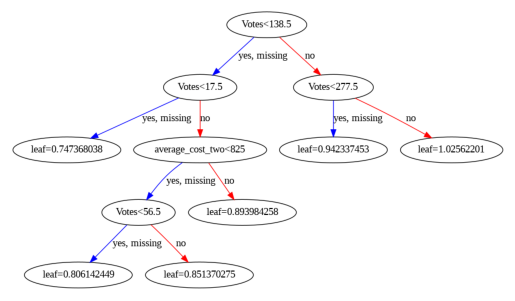

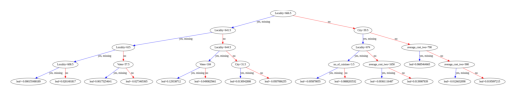

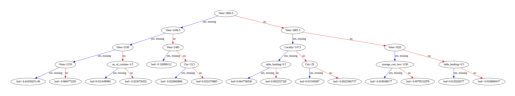

In [ ]:
dtrain = xgboost.DMatrix(X_train, label=y_train)
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.3, 
    'max_depth': 4
}

# train an XGBoost model
xgb_model = xgboost.train(params, dtrain, num_boost_round=100)

# plot the first tree
plot_tree(xgb, num_trees=0)
plt.show()

# plot the middle tree
plot_tree(xgb, num_trees=50)
plt.show()

# plot the last tree
plot_tree(xgb, num_trees=99)
plt.show()

In [ ]:
# Define the cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgboost.XGBRegressor(params)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [ ]:
cv_results = xgboost.cv(params=params,
                    dtrain=dtrain,
                    num_boost_round=100,
                    nfold=5,
                    metrics='rmse',
                    early_stopping_rounds=100,
                    as_pandas=True)

In [ ]:
# print the mean RMSE score over all folds
print('Mean RMSE:', np.mean(cv_results['test-rmse-mean']))

Mean RMSE: 0.4021484330863391


In [ ]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0.1, 1, 10]
}

# create the XGBRegressor model
xgb_model = xgboost.XGBRegressor()

# create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error'
)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and RMSE score
print('Best Parameters:', grid_search.best_params_)
print('Best RMSE Score:', np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1}
Best RMSE Score: 0.35575541270011407


In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, reg_alpha=0.1, reg_lambda=10)
xgb.fit(X_train,y_train)
xgb_pred= xgb.predict(X_test)
print('RMSE score through XGBoost : ',np.sqrt(mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))

RMSE score through XGBoost :  0.37297388556215366
R square value using XGBoost 0.4962238179257811


In [ ]:
y_pred = xgb.predict(X_test)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first 10 rows of the results DataFrame
print(results.head(10))


      Actual  Predicted
8197     3.2   3.176917
2293     4.2   3.040675
2110     3.6   3.556087
2899     4.2   3.905091
4542     3.6   3.648833
2934     2.7   3.194626
5214     4.2   3.646371
7502     3.4   3.438758
2374     4.1   3.875050
2366     4.1   3.678451


# **SVM based Regression**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
svm_pred = regressor.predict(X_test)

print('R-squared score:', r2_score(y_test, y_pred))
print('Root mean squared error:', mean_squared_error(y_test, svm_pred, squared=False))

R-squared score: 0.42784723854577567
Root mean squared error: 0.39305699638424874


In [ ]:
# Plot the residuals
residuals = y_test - svm_pred
plt.scatter(svm_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

In [ ]:
# Plot the histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

In [ ]:
# Plot the heatmap of the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Conclusion**

In [ ]:
print('RMSE score through Linear Regression : ',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
print('R square value using Linear Regression',r2_score(y_test,np.round(lr_pred,decimals=1)))
print('\n')
print('RMSE score through Decision tree Regression : ',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))
print('R square value using Decision Tree Regression',r2_score(y_test,np.round(dt_pred,decimals=1)))
print('\n')
print('RMSE score through Random Forest : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(rf_pred,decimals=1))))
print('R square value using Random Forest',r2_score(y_test,rf_pred))
print('\n')
print('RMSE score through XGBoost : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(xgb_pred,decimals=1))))
print('R square value using XGBoost',r2_score(y_test,xgb_pred))
print('\n')
print('RMSE score through SVM : ',np.sqrt(metrics.mean_squared_error(y_test,np.round(svm_pred,decimals=1))))
print('R square value using SVM',r2_score(y_test,svm_pred))

RMSE score through Linear Regression :  0.4571163082299569
R square value using Linear Regression 0.22182320578665893


RMSE score through Decision tree Regression :  0.5323391049097144
R square value using Decision Tree Regression -0.04939603471694065


RMSE score through Random Forest :  0.36367102589756023
R square value using Random Forest 0.5148286599684972


RMSE score through XGBoost :  0.3551911561332209
R square value using XGBoost 0.5353358267967456


RMSE score through SVM :  0.3943054460982829
R square value using SVM 0.42784723854577567



* XG Boost regressor has the least rmse score which indirectly tells us that it is the most accurate model among the 4 models
* R square value and Variance explained are almost equal
* Generally, Random Forest is expected to have lower RMSE than a Decsion 
Tree which is evident in our case study
* Due to the assumptions of Linear Regression algorithm which is a bit offset from the real case scenaro, Linear Regression has under performed

